In [1]:

import matplotlib.pyplot as plt
import numpy as np
import requests
import json


/home/nicolasrodrigeztorres04/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [38]:
#Variables Globales, estas variables hacen referencia a los 5 tipos de criticidad de los cve
none = 0
low = 0
medium = 0
high = 0
critical = 0

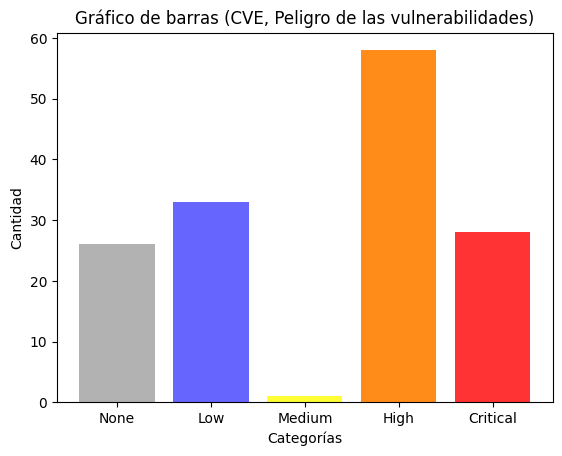

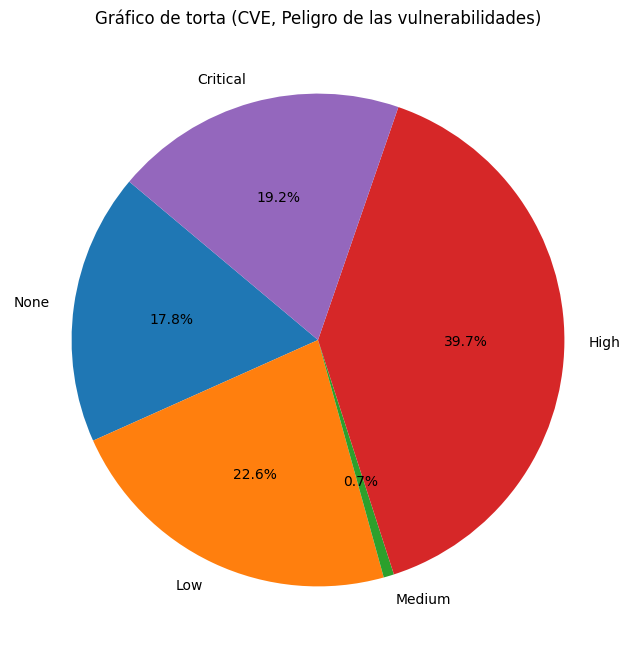

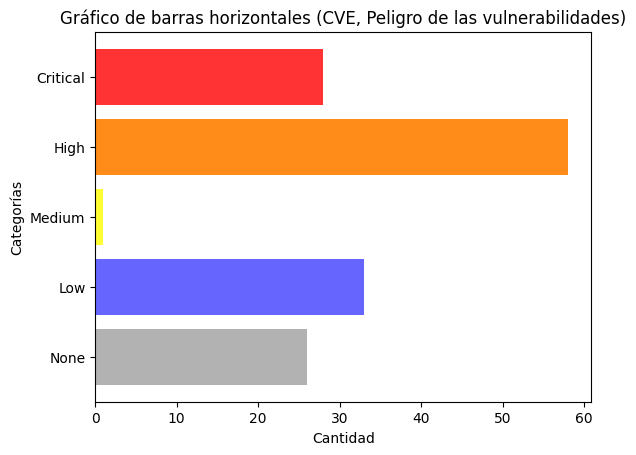

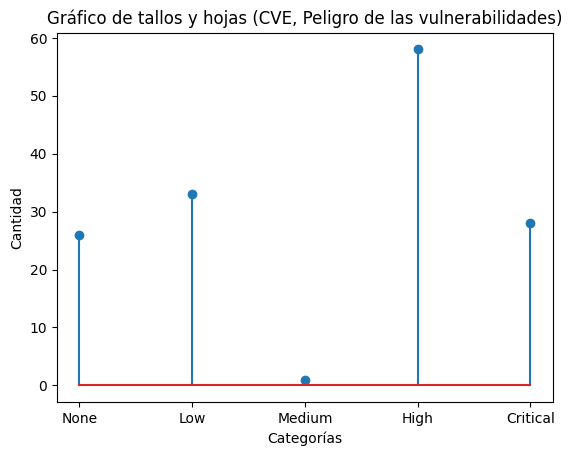

In [147]:
#Ejecucion
#en primerl lugar se crea el objeto que se enviará a la funcion de consultar item
dat = {
    "url":"http://127.0.0.1:5000/get_item",
    "db":"SoftwareScan",
    "cont":"Linux",
    "item":"Scan_1",
    "partition": '100'
}
#se envia el objeto creado a al funicion de obtener item que usa una api externa, con la intenciond eno colocar el api key en 
# nuestro codigo,y de no colocar tanto codigo que se puede reciclar
obj = consult_item(dat)
#se envia el objeto en la llave data que es la 2da suseción en el diccionario recolectado por la api,
#esta fincion es la que asigna los valores a las variables globales y funciona como funcion recursiva ya que la otra manera era
#colocar más de 3 for anidados
valors(obj['response']['data'])
#llamamos las funciones de gráficas para su ejecución
#la cual tiene las siguientes opciones de gráficas
# bar : para graficos de barras normales
# cir : para graficos de tortas
# bar-h : para grafica de barras horizontales
# t-h : para grafica de barras de tallos y ho¿ojas
# total : para mostrar las 4 graficas

graf('total')

#esta funcion resetea el valor de las variables globales, se recomienta no quitar
reset_val()


  

In [19]:
#funciones de concatenacion de datos
#esta funcion pide un objeto diccionadio y lo lee, y así busca cuantos cve hay de todas las criticidades
def valors(object):
    global low,none,medium,high,critical
   # print(object)
    
    for key,item in object.items():
        if 'Score' in item:
           # print("encontro")
            #print(f'ia esta: {json.dumps(item,indent=2)}')
            ob = item['Score']['severity']
            if 'LOW' in ob:
                low += 1
            elif 'NONE' in ob:
                none += 1
            elif 'MEDIUM' in ob:
                medium =+ 1
            elif 'HIGH' in ob:
                high += 1
            elif 'CRITICAL' in ob:
                critical +=1
        elif 'Score' not in item and 'data' not in item: 
            #print(f'No encontrado: {json.dumps(item,indent=2)}')
           # print("Vuele")
            valors(item)
    #    for y,i in item.items():
       #     for x,w in i.items():
 
#esta funcion simplemente resetea las variables globales, para que no se sumen una vez el codigo termine
def reset_val():
    global low,none,medium,high,critical
    low = none = medium = high = critical = 0
    
    
    

In [144]:
#funciones de azure cosmos
#esta funcion usa un objeto tipo diccionario creado para la solicitud en especifico, la cual llamá una api ejecutada en entorno local
# la cual ya tiene nustras llaves y la hace más segura, esto con el fin de optimizar codigo en este archizo y de porteger mis llaves
# de base de datos
def consult_item(object):
   # print(json.dumps(object,indent=2))
    data = { 
     "name_Db":object['db'],
     "container" : object['cont'],
     "name_item" :  object['item'],
     "partition" :  object['partition']
    }
    try:
        result = requests.get(object['url'],json=data)
        response = result.json()
       # print(json.dumps(response,indent=2))
        return response
    except Exception as e:
        print(f"Excepcion controlada, error {e}")
    

In [146]:
#funciones de graficas
#esta funcion usa las variables globales ya asignadas en funciones anteriores para generar un graficod de barras
def graf(option):
    global low,none,medium,high,critical
    type = ""
    #print(f" dla dato {dat} y la opcion {option}")
    #categorias del gráfico
    categ = ['None', 'Low', 'Medium', 'High', 'Critical']
    #valor de cada categoria
    val =  [none,low,medium,high,critical]
    #colores
    colors = [
              (0.0, 0.0, 0.0, 0.3),   
              (0.0, 0.0, 1.0, 0.6),   
              (1.0, 1.0, 0.0, 0.8),   
              (1.0, 0.5, 0.0, 0.9),   
              (1.0, 0.0, 0.0, 0.8)] 
    # se crea una subfuncion para mostrar las graficas, dado que si se deja solo omostrar y se escoge la opcion total,
    # al finla de la impresion se mostrarán todas las graficas y una más vacia,de el primer llamado a la funcion
    #la funcion tambien asigna el valor el label a mostrar en el eje x y 
    def out(x,y):
         # Añadir etiquetas y título
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f'Gráfico de {type} (CVE, Peligro de las vulnerabilidades)')       
        # Mostrar la gráfica
        plt.show()
    #creacion de figuras segun opcion
    #grafica de barra normal
  
    if option == 'bar':
        type = "barras"
        plt.bar(categ, val, color=colors)
        out('Categorías','Cantidad')
        #grafica de torta
    elif option == 'cir':
        type = 'torta'
        plt.figure(figsize=(8, 8))
        plt.pie(val, labels=categ, autopct='%1.1f%%', startangle=140)
        out("","")
        #grafica de barra horizontal
    elif option == 'bar-h':
        type = 'barras horizontales'
        plt.barh(categ, val, color=colors)
        out("Cantidad","Categorías")
        #grafica de tallos y hojlas
    elif option == 't-h' :
        type = 'tallos y hojas'
        plt.stem(categ,val)
        out('Categorías','Cantidad')
        #en la opcion de total, se crea un vector con las opciones antes mencinonadas, luego se usa un bucle for para recorrer cada 
    #item del vecto, y a su vez se hace un llamado a la mima funcion de graficar usando cada opcion como funcion recursiva
    elif option == 'total':
        options = ['bar', 'cir', 'bar-h', 't-h']
        for i in options: 
            graf(i)